# Sim-on-Wheels on Kitti-360 Demo

##### Clone the repo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive
# Downloading the rep; this branch already contains the 20 frame of sample kitti data
!git clone -b kitti-colab-demo https://github.com/Sim-on-Wheels/Sim-on-wheels-Renderer.git
%cd /content/drive/MyDrive/Sim-on-wheels-Renderer/

##### Get the assets folder
1. Open the assets folder in your drive: https://drive.google.com/drive/folders/16ozzugFFSeh28YHNLoLhyWy5Z3Y8iDwe?usp=drive_link
2. Click and open the assets folder dropdown menu --> `Organize` --> `Add shortcut` --> Add to the repo folder: `MyDrive/Sim-on-Wheels-Renderer`

In [ ]:
# Verify assets folder is present
import os
if 'assets' not in os.listdir():
  raise Exception('Assets folder has not be added properly!')

In [ ]:
!pip install -r requirements.txt

In [20]:
import numpy as np
from omegaconf import OmegaConf, DictConfig
from kitti360 import HIL_rendering, custom_run_window_config, DEFAULT_ARGS
import moderngl_window as mglw
BASE_KITTI_CONFIG_PATH = 'configs/kitti360.yaml'

In [21]:
def gen_random_actor_cfg(n_actors: int):
    cfg = {}
    for i in range(n_actors):
        id = 'actor_' + repr(i)
        anim_types = [ 'man_running', 'woman_walking' ] # folder name of the asset from ./assets/human_animations
        animation_type =  str(np.random.choice(anim_types).item())
        x_val = np.random.uniform(-6.0, 5.0) # ranges approximately based on kitti sidewalk limits
        y_val = 0.0 # how high above ground
        z_val = np.random.uniform(4.0, 12.0) # how far away from ego vehicle
        pos = [x_val, y_val, z_val]
        if x_val < -2.5: # actor to the left of the car --> make angle so that actor approximately faces right on average
            rot_angle = np.random.uniform(30, 150)
        else:
            rot_angle = np.random.uniform(-150, -45)
        rot = [0.0, rot_angle, 0.0]
        scale = [2.5, 2.5, 2.5]
        cfg[id] = {
                'animation_type': animation_type,
                'object2scenario': {
                    'pos' : pos,
                    'rot' : rot,
                    'scale' : scale
                }
            }
    return cfg
def auto_gen_kitti_config() -> DictConfig:
    base_cfg = OmegaConf.load(BASE_KITTI_CONFIG_PATH)
    actor_gen = gen_random_actor_cfg(np.random.randint(1, 3))
    base_cfg.scenario_configs.jaywalking.actor_configs = actor_gen
    base_cfg.scenario_configs.jaywalking.trigger_distance = 2.0 # just force immediate animation with low trigger distance
    print(base_cfg.scenario_configs.jaywalking.actor_configs)
    base_cfg.device = 'cpu'
    base_cfg.display = 'headless'
    return base_cfg

In [22]:
custom_config = auto_gen_kitti_config()
config_cls = HIL_rendering
config_cls.argv = DEFAULT_ARGS
values = DEFAULT_ARGS
custom_run_window_config(custom_config, config_cls, values)

{'actor_0': {'animation_type': 'woman_walking', 'object2scenario': {'pos': [0.02118239805198474, 0.0, 5.948116164220022], 'rot': [0.0, -71.94682714314682, 0.0], 'scale': [2.5, 2.5, 2.5]}}, 'actor_1': {'animation_type': 'woman_walking', 'object2scenario': {'pos': [-5.856301476621307, 0.0, 7.018056447351252], 'rot': [0.0, 124.76735456611472, 0.0], 'scale': [2.5, 2.5, 2.5]}}}


ImportError: cannot import name 'egl' from 'glcontext' (c:\Users\Bharg\miniconda3\envs\sow\lib\site-packages\glcontext\__init__.py)

In [23]:
from PIL import Image
import matplotlib.pyplot as plt
import os
def visualize_images(im1, im2):
    """Visualize images in a grid format"""
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(im1)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_title('origin')
    ax2.imshow(im2)
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_title('rendered')
    plt.show()
def read_images(folder_path):
    img_list = []
    for img in os.listdir(folder_path):
        img_list.append(Image.open(os.path.join(folder_path, img)))
    return img_list

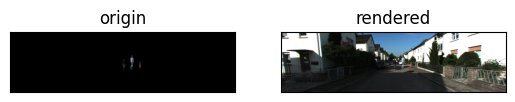

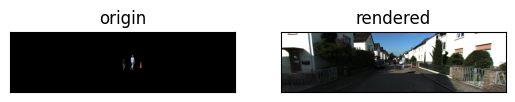

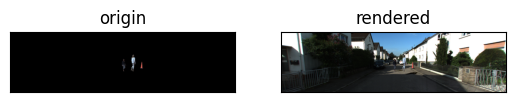

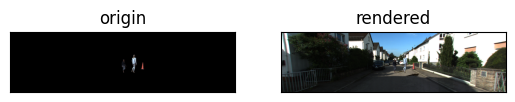

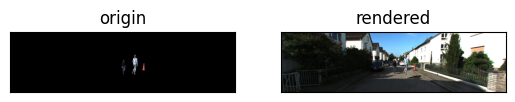

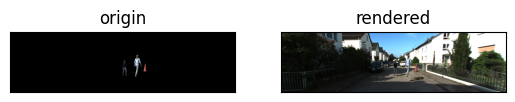

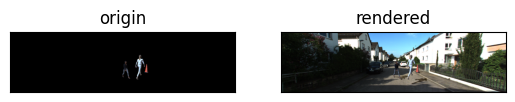

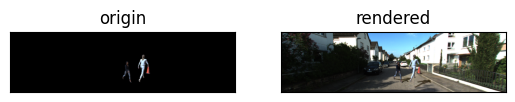

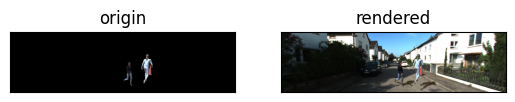

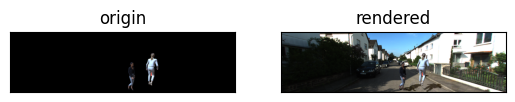

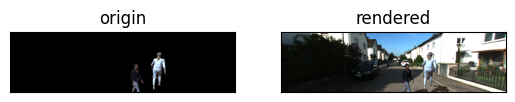

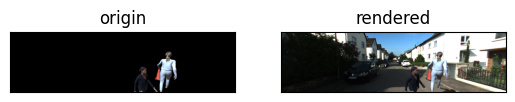

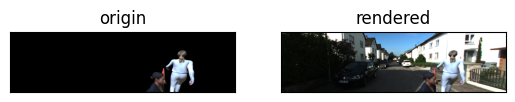

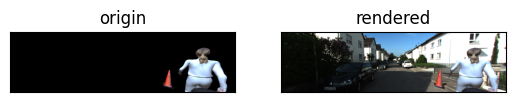

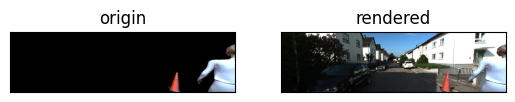

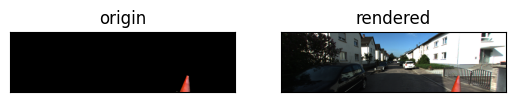

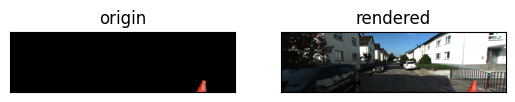

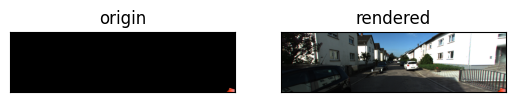

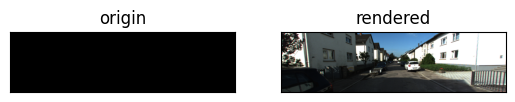

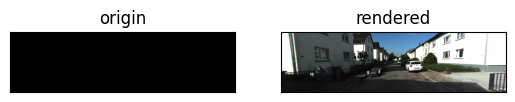

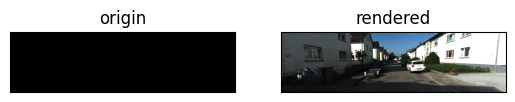

In [18]:
gt = read_images('outputs/kitti360/1578-1598-ped-cone2/gt')
insert = read_images('outputs/kitti360/1578-1598-ped-cone2/insert')
for i in range(len(gt)):
    visualize_images(gt[i], insert[i])